In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
data = pd.read_excel('L6_02_teleporter_data_demo.xlsx', sheet_name='All')
data

,date,make,location,dist,mass,time,wx,rate,price,energy,days_out
0,2050-07-13,Blink_Corp,North,506.979569,1551.876380,967.857,0.591,20,10139.59,1675.257,64
1,2050-07-13,Blink_Corp,North,530.625972,880.794702,808.784,0.858,20,10612.52,831.608,73
2,2050-07-16,Blink_Corp,North,499.877770,1871.964680,186.641,0.073,20,9997.56,384.230,86
3,2050-07-16,Blink_Corp,North,494.977752,1933.774834,1062.796,0.524,20,9899.56,2238.021,205
4,2050-07-15,Blink_Corp,North,544.743127,1739.514349,1720.929,0.958,20,10894.86,3587.612,222
...,...,...,...,...,...,...,...,...,...,...,...
995,2050-07-13,Insta_Port,West,362.427544,1359.823400,115.113,0.058,20,7248.55,124.810,258
996,2050-07-11,Insta_Port,West,397.339991,1556.291391,235.827,0.126,20,7946.80,320.826,290
997,2050-07-16,Insta_Port,West,341.481065,843.267108,284.598,0.297,20,6829.62,180.296,345
998,2050-07-11,Insta_Port,West,348.625487,207.505519,64.951,0.145,10,3486.25,10.337,32


In [3]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1000 non-null   datetime64[ns]
 1   make      1000 non-null   object        
 2   location  1000 non-null   object        
 3   dist      1000 non-null   float64       
 4   mass      1000 non-null   float64       
 5   time      1000 non-null   float64       
 6   wx        1000 non-null   float64       
 7   rate      1000 non-null   int64         
 8   price     1000 non-null   float64       
 9   energy    1000 non-null   float64       
 10  days_out  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 86.1+ KB


In [4]:
# Display summary statistics
data.describe()

,date,dist,mass,time,wx,rate,price,energy,days_out
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2050-07-14 01:00:28.799999488,611.150085,839.490066,374.997487,0.347867,19.270000,11719.142980,547.931628,189.341000
min,2050-07-11 00:00:00,273.926231,4.415011,34.777000,0.010000,10.000000,2739.260000,0.233000,1.000000
25%,2050-07-12 00:00:00,455.478588,388.520971,136.496750,0.164000,20.000000,7407.942500,78.860250,95.000000
50%,2050-07-14 00:00:00,582.300201,773.730684,251.131000,0.323000,20.000000,10149.905000,252.628000,192.000000
75%,2050-07-16 00:00:00,802.155355,1234.547461,484.647250,0.473250,20.000000,14490.572500,641.338250,282.250000
max,2050-07-17 00:00:00,963.742464,2200.883002,2066.065000,1.000000,30.000000,28296.110000,4643.571000,365.000000
std,NaN,210.067949,548.464611,339.423892,0.228813,4.689253,5003.963708,759.493569,105.383141


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


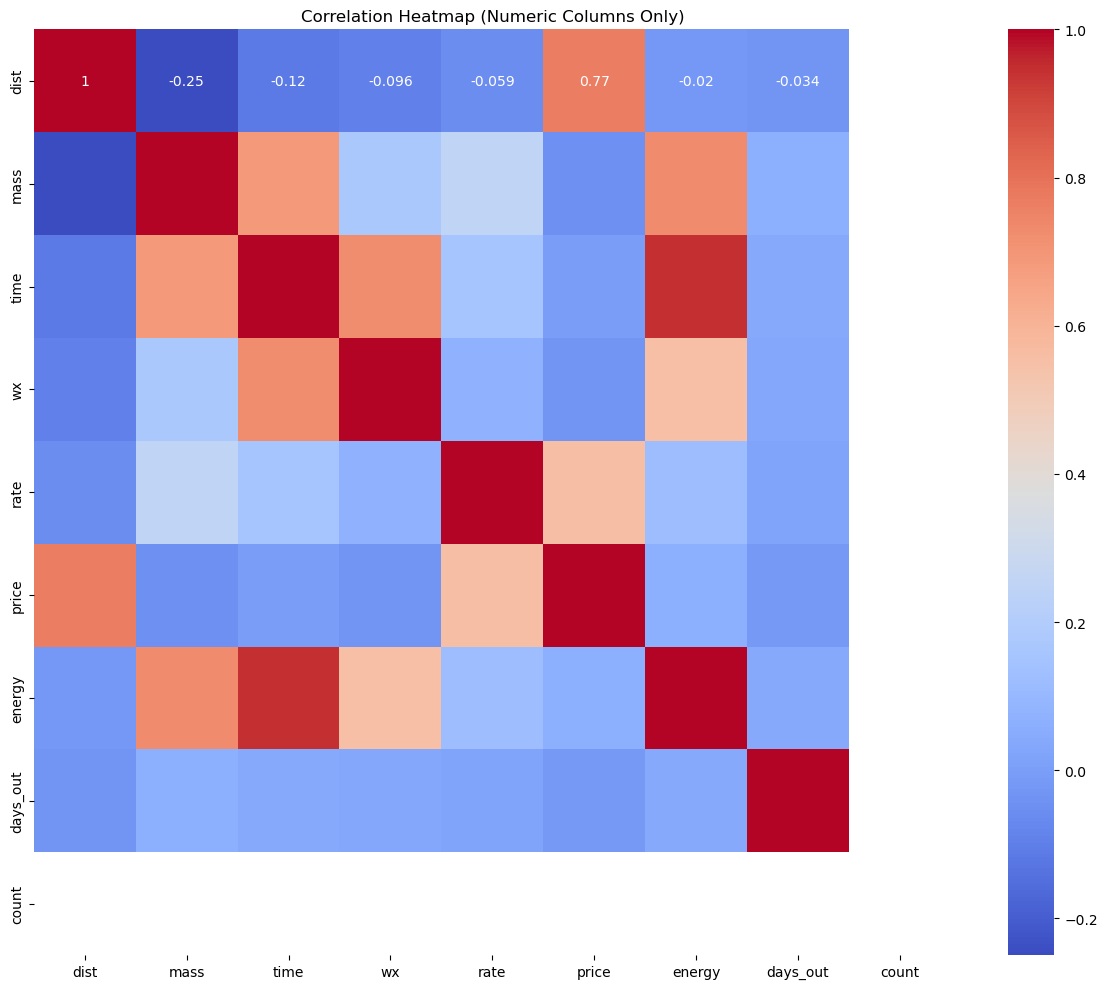

<Figure size 640x480 with 0 Axes>

In [20]:
# Select only numeric columns for correlation
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_columns]

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.tight_layout()  # Adjust the plot to ensure all labels are visible
plt.show()
plt.savefig('Results/correlation_heatmap.png')

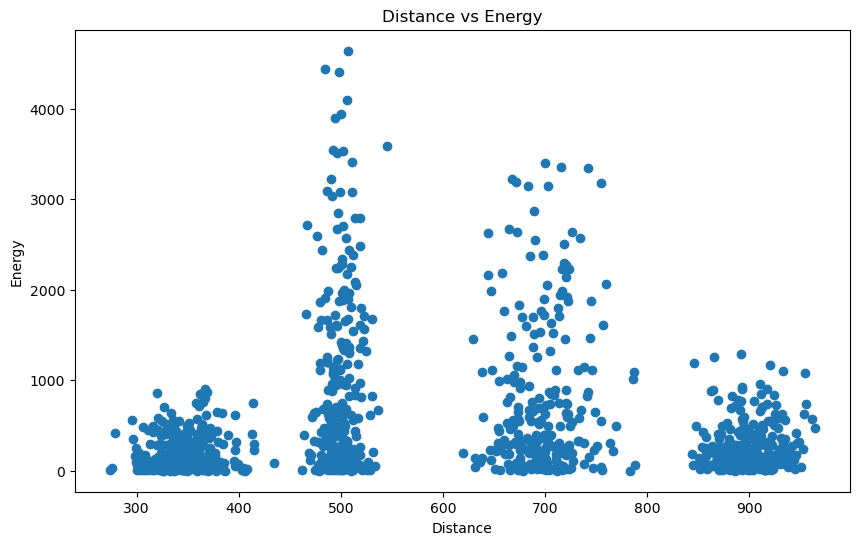

<Figure size 640x480 with 0 Axes>

In [21]:
# Create a scatter plot of distance vs. energy
plt.figure(figsize=(10, 6))
plt.scatter(data['dist'], data['energy'])
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.title('Distance vs Energy')
plt.show()
plt.savefig('Results/distance_vs_energy_scatter.png')

Intercept: 571.1057661693781
Coefficient: -0.05412680917235148


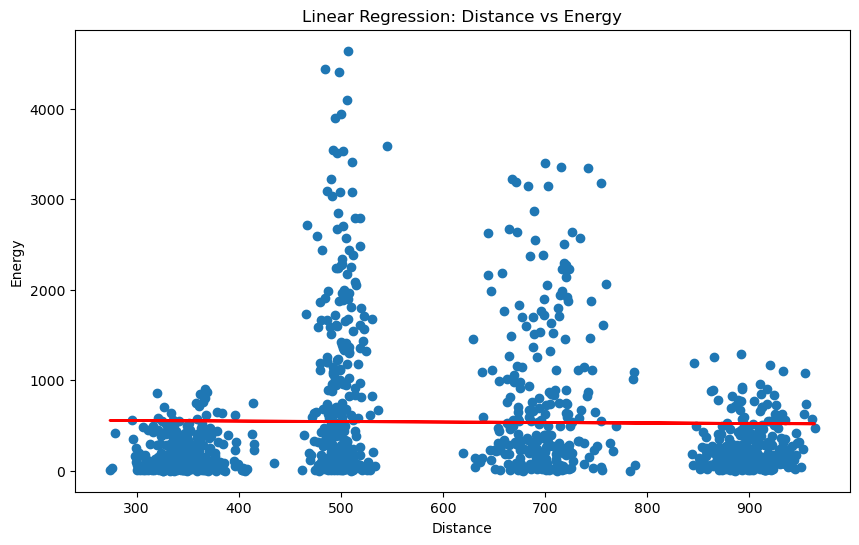

<Figure size 640x480 with 0 Axes>

In [22]:
# Perform linear regression
X = data[['dist']]
y = data['energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.title('Linear Regression: Distance vs Energy')
plt.show()
plt.savefig('Results/linear_regression1.png')

Intercept: 489.62611815168617
Coefficient: -0.1920354424166089


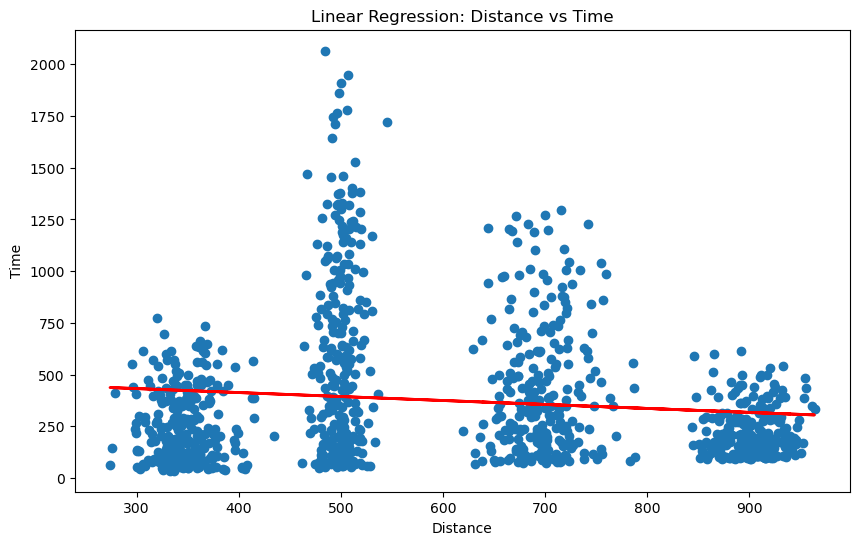

Analysis complete. Check the generated PNG files for visualizations.


<Figure size 640x480 with 0 Axes>

In [23]:
# Perform linear regression
X = data[['dist']]
y = data['time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Distance')
plt.ylabel('Time')
plt.title('Linear Regression: Distance vs Time')
plt.show()
plt.savefig('Results/linear_regression2.png')

print("Analysis complete. Check the generated PNG files for visualizations.")

Intercept: 446.03779068570697
Coefficient: 0.007798110811133676


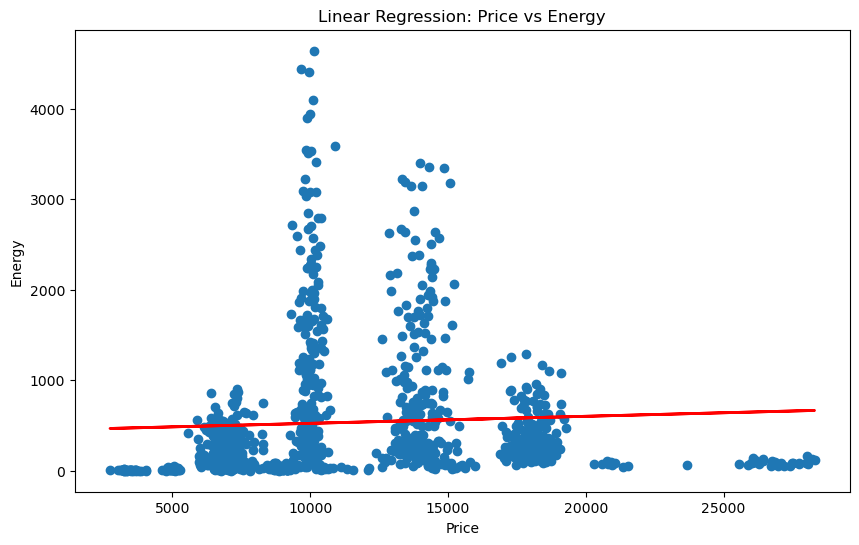

<Figure size 640x480 with 0 Axes>

In [24]:
# Perform linear regression
X = data[['price']]
y = data['energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Energy')
plt.title('Linear Regression: Price vs Energy')
plt.show()
plt.savefig('Results/linear_regression3.png')

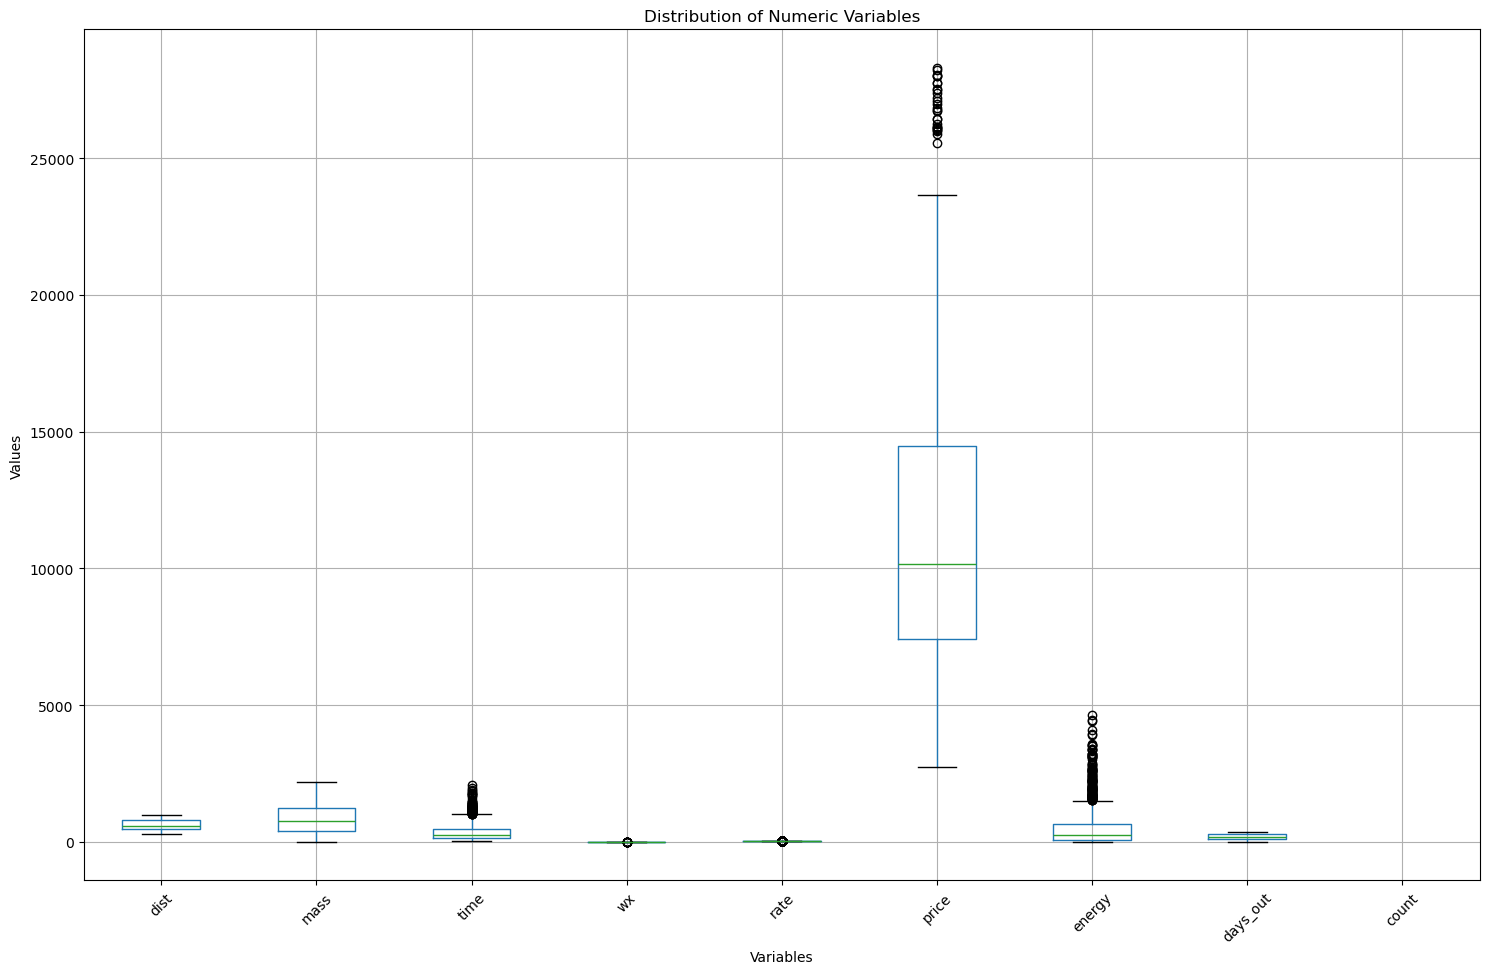

<Figure size 640x480 with 0 Axes>

In [26]:
# Create the box plot
plt.figure(figsize=(15, 10))
data[numeric_columns].boxplot(rot=45)
plt.title('Distribution of Numeric Variables')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.suptitle('')  # Remove the automatic suptitle
plt.tight_layout()
plt.show()
plt.savefig('Results/numeric_variables_boxplot.png')